In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

In [2]:
weights = np.random.rand(2, 4)
print(weights)
input_vector = np.array([1, 2, 3, 4])
print(weights - input_vector)

[[0.18070171 0.23431197 0.14940212 0.36879535]
 [0.82002458 0.84942654 0.19333663 0.45458601]]
[[-0.81929829 -1.76568803 -2.85059788 -3.63120465]
 [-0.17997542 -1.15057346 -2.80666337 -3.54541399]]


In [3]:
class KSOFM:
    def __init__(self, num_input, num_output, learning_rate=0.1, epochs=100):
        self.num_input = num_input
        self.num_output = num_output
        self.learning_rate = learning_rate
        self.weights = np.random.rand(num_output, num_input)
        # self.weights = np.array([
        #     [0.3, 0.5, 0.7, 0.2],
        #     [0.6, 0.7, 0.4, 0.3]
        # ])
        self.epochs = epochs
    
    def train(self, X):
        for i in range(self.epochs):
            for _, x in enumerate(X):
                # print(x)
                # print(self.weights)
                # Calculate the distance between the input vector and each weight vector
                distances = np.linalg.norm(self.weights - x, axis=1)
                # print(distances)
                # Find the index of the winning neuron
                winner = np.argmin(distances)
                # Update the weights of the winning neuron
                self.weights[winner] += self.learning_rate * (x - self.weights[winner])
                # print(f'Epoch {i+1}, Input {x}, Winner {winner}, Weights {self.weights}')
            print(f'Epoch {i+1}, Weights {self.weights}')
        return self.weights
    
    def predict(self, X):
        y_pred = []
        for _, x in enumerate(X):
            distances = np.linalg.norm(self.weights - x, axis=1)
            winner = np.argmin(distances)
            y_pred.append(winner)
        return y_pred

In [4]:
X = np.array([[1, 0, 1, 0], [1, 0, 0, 0], [1, 1, 1, 1], [0, 1, 1, 0]])
ksofm = KSOFM(4, 2, learning_rate=0.6, epochs=10)
w = ksofm.train(X)
# print(w)

Epoch 1, Weights [[0.24402544 0.95083181 0.90230497 0.37810263]
 [0.86537194 0.06722389 0.26718896 0.07381813]]
Epoch 2, Weights [[0.27904407 0.99213309 0.9843688  0.30049642]
 [0.97845951 0.01075582 0.28275023 0.0118109 ]]
Epoch 3, Weights [[0.28464705 0.99874129 0.99749901 0.28807943]
 [0.99655352 0.00172093 0.28524004 0.00188974]]
Epoch 4, Weights [[2.85543528e-01 9.99798607e-01 9.99599841e-01 2.86092708e-01]
 [9.99448563e-01 2.75349046e-04 2.85638406e-01 3.02359047e-04]]
Epoch 5, Weights [[2.85686965e-01 9.99967777e-01 9.99935975e-01 2.85774833e-01]
 [9.99911770e-01 4.40558474e-05 2.85702145e-01 4.83774476e-05]]
Epoch 6, Weights [[2.85709914e-01 9.99994844e-01 9.99989756e-01 2.85723973e-01]
 [9.99985883e-01 7.04893558e-06 2.85712343e-01 7.74039161e-06]]
Epoch 7, Weights [[2.85713586e-01 9.99999175e-01 9.99998361e-01 2.85715836e-01]
 [9.99997741e-01 1.12782969e-06 2.85713975e-01 1.23846266e-06]]
Epoch 8, Weights [[2.85714174e-01 9.99999868e-01 9.99999738e-01 2.85714534e-01]
 [9.9999

In [5]:
df = pd.read_csv('breast-cancer-wisconsin-data_data.csv')
df['diagnosis'].replace('M', 1, inplace=True)
df['diagnosis'].replace('B', 0, inplace=True)

X = df.iloc[:, 2:32]
y = df.iloc[:, 1]
X = np.array(X)
y = np.array(y)
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
ksofm = KSOFM(30, 2, learning_rate=0.1, epochs=3000)
w = ksofm.train(X_train)
pred = ksofm.predict(X_test)

Epoch 1, Weights [[1.19064244e+01 1.81278590e+01 7.72546873e+01 4.44291498e+02
  1.02783057e-01 9.97420759e-02 7.21119160e-02 3.83851097e-02
  1.92739159e-01 6.53267161e-02 3.40980847e-01 1.61961188e+00
  2.41594626e+00 2.51720927e+01 7.19553433e-03 2.23369597e-02
  2.56535234e-02 1.07842566e-02 2.42421827e-02 3.39660226e-03
  1.33699979e+01 2.51887526e+01 8.80450627e+01 5.62152029e+02
  1.36355301e-01 2.39845511e-01 2.31869555e-01 1.00311870e-01
  3.07812432e-01 8.41588809e-02]
 [1.96265555e+01 2.30039069e+01 1.30209299e+02 1.21018662e+03
  1.01605198e-01 1.56525521e-01 1.86652772e-01 1.04269435e-01
  1.95903748e-01 6.22047076e-02 8.10848816e-01 1.34484482e+00
  5.98230527e+00 1.00370065e+02 6.27168088e-03 3.82024659e-02
  4.87421121e-02 1.67462656e-02 2.32307760e-02 4.46307855e-03
  2.42460754e+01 3.07503352e+01 1.64406956e+02 1.80658779e+03
  1.37169292e-01 3.94551582e-01 4.85491474e-01 2.01648106e-01
  3.27122692e-01 8.97261821e-02]]
Epoch 2, Weights [[1.19064244e+01 1.81278590e+01

In [11]:
# print(pred)
# print(y_test)
acc = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred)
conf_matrix = confusion_matrix(y_test, pred)
print(f'Accuracy: {acc}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix: \n{conf_matrix}')
# print(acc)

Accuracy: 0.9122807017543859
F1 Score: 0.8387096774193549
Confusion Matrix: 
[[78  1]
 [ 9 26]]


# visualization

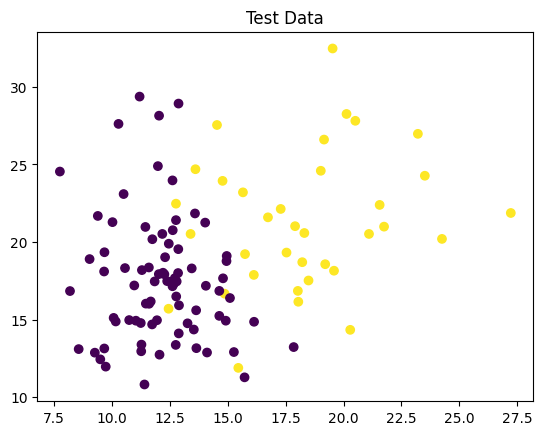

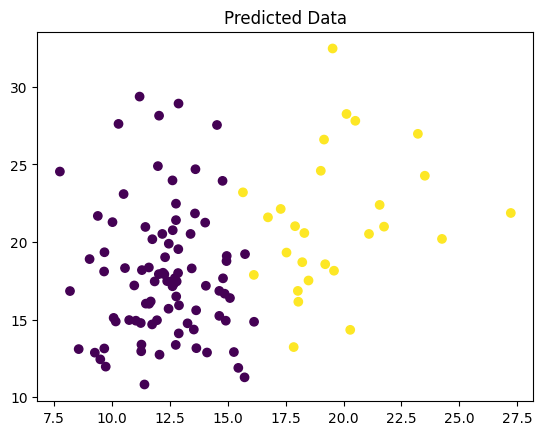

In [17]:
# scatter plot of the test data
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.title('Test Data')
plt.show()
# scatter plot of the predicted data
plt.scatter(X_test[:, 0], X_test[:, 1], c=pred)
plt.title('Predicted Data')
plt.show()

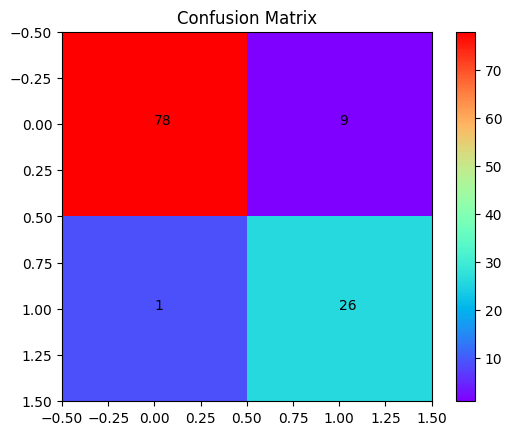

In [21]:
# plot confusion matrix
plt.imshow(conf_matrix, cmap='rainbow')
# put labels on the plot
plt.colorbar()
# put values on the plot
for i in range(2):
    for j in range(2):
        plt.text(i, j, conf_matrix[i, j])
plt.title('Confusion Matrix')
plt.show()